In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

In [24]:
# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
!pip install xgboost

In [3]:
log_train_data=pd.read_csv('C:\\ubion\dacon\\Dacon_ClientRating\\train_data_1')
test_data=pd.read_csv('C:\\ubion\\dacon\\open\\test.csv')

In [4]:
test_data.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [5]:
selected_columns = ['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
                    '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

### 설명변수들의 범위가 넓고 정규분포와 거리가 멀어서 RobustScale 사용 

In [6]:
# RobustScaler 인스턴스 생성
scaler = RobustScaler()

# 선택한 열들을 Robust Scaling
log_train_data[selected_columns] = scaler.fit_transform(log_train_data[selected_columns])

In [7]:
log_train_data.describe()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000
mean,0.108979,0.330401,-0.032679,0.413362,0.288545,0.041580,0.086996,0.399921,0.345667,0.300764,0.324186,54.381714,0.005805
std,0.748465,0.470360,0.471109,0.117788,1.803791,0.746692,0.805911,0.211644,0.919112,1.374910,1.010553,1414.783889,0.079967
min,-1.130435,0.000000,-0.750000,0.110641,-1.386957,-1.453840,-1.333333,0.000623,0.000000,-0.799589,-0.658875,0.000000,0.000000
25%,-0.478261,0.000000,-0.500000,0.391565,-0.369565,-0.472459,-0.466667,0.254432,0.000000,-0.388124,-0.349850,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.391565,0.000000,0.000000,0.000000,0.572731,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.521739,1.000000,0.500000,0.497793,0.630435,0.527541,0.533333,0.572731,0.000000,0.611876,0.650150,0.000000,0.000000
max,1.826087,1.000000,0.500000,0.497793,194.239130,83.303336,9.666667,0.572731,30.000000,55.328453,12.319135,75768.000000,4.000000


In [8]:
X = log_train_data.drop(['ID', '대출등급'], axis=1)  # 'ID'와 '대출등급' 열 제외한 열들을 특성으로 설정
y = log_train_data['대출등급']  # '대출등급'을 타겟으로 설정

# 학습(train) 세트와 테스트(test) 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 생성
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_classifier.fit(X_train, y_train)

# 테스트 세트로 모델 평가
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8060127732488707

Classification Report:
               precision    recall  f1-score   support

           A       0.90      0.83      0.86      3301
           B       0.82      0.86      0.84      5799
           C       0.79      0.89      0.83      5477
           D       0.74      0.68      0.71      2733
           E       0.73      0.60      0.66      1481
           F       0.76      0.45      0.57       387
           G       0.88      0.09      0.16        81

    accuracy                           0.81     19259
   macro avg       0.80      0.63      0.66     19259
weighted avg       0.81      0.81      0.80     19259



In [10]:
log_train_data['대출등급']

0        C
1        B
2        A
3        C
4        B
        ..
96287    C
96288    E
96289    A
96290    D
96291    C
Name: 대출등급, Length: 96292, dtype: object

In [11]:
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('A','0'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('B','1'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('C','2'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('D','3'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('E','4'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('F','5'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('G','6'))

In [12]:
log_train_data['대출등급'] = log_train_data['대출등급'].astype(int)

In [31]:
# XGBoost 분류 모델 생성
xgb_classifier = XGBClassifier(random_state=42)

# 모델 학습
xgb_classifier.fit(X_train, y_train)
                  # , early_stopping_rounds=100, eval_metric='logloss', eval_set=[(X_train,y_train)],verbose=True )

# 테스트 세트로 모델 평가
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8519133911418039

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3301
           1       0.85      0.87      0.86      5799
           2       0.86      0.89      0.88      5477
           3       0.82      0.81      0.81      2733
           4       0.78      0.73      0.76      1481
           5       0.77      0.68      0.72       387
           6       0.75      0.48      0.59        81

    accuracy                           0.85     19259
   macro avg       0.82      0.76      0.79     19259
weighted avg       0.85      0.85      0.85     19259



In [20]:
# XGBoost 분류 모델 생성

X = log_train_data.drop(['ID', '대출등급'], axis=1)  # 'ID'와 '대출등급' 열 제외한 열들을 특성으로 설정
y = log_train_data['대출등급']  # '대출등급'을 타겟으로 설정


# 학습(train) 세트와 테스트(test) 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#xgb_classifier = XGBClassifier(n_estimators = 400,learning_rate=0.1,max_depth=3)
# 모델 학습
xgb_classifier.fit(X_train, y_train)

# 테스트 세트로 모델 평가
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8068435536632224

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      3301
           1       0.81      0.85      0.83      5799
           2       0.79      0.88      0.83      5477
           3       0.77      0.70      0.73      2733
           4       0.77      0.62      0.69      1481
           5       0.79      0.61      0.69       387
           6       0.84      0.38      0.53        81

    accuracy                           0.81     19259
   macro avg       0.81      0.69      0.73     19259
weighted avg       0.81      0.81      0.80     19259



In [ ]:
# XGBoost 분류 모델 생성
xgb_classifier = XGBClassifier(random_state=42)

# 모델 학습
xgb_classifier.fit(X_train, y_train)
                  # , early_stopping_rounds=100, eval_metric='logloss', eval_set=[(X_train,y_train)],verbose=True )

# 테스트 세트로 모델 평가
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

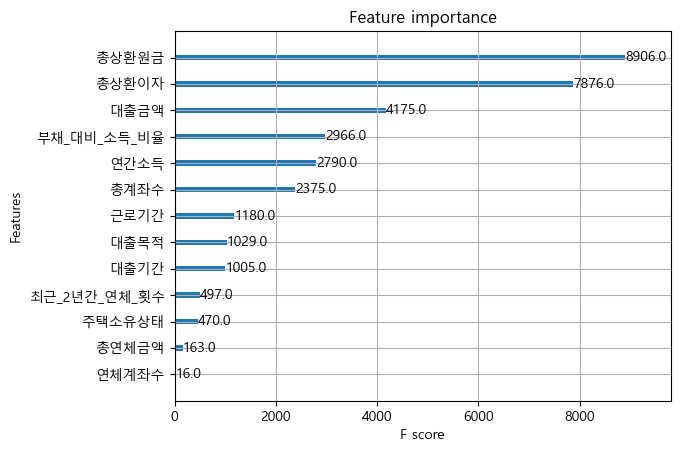

In [25]:
plot_importance(xgb_classifier)